**Introdução:**

**Projeto de análise de dados usando Machine Learning e Cluster.
Objetivo: entender melhor padrões de consumo de pessoas de ambos os sexos com idades entre 18 e 70 anos que tem uma renda anual variando entre 20mil e 250mil reais.**



# 1. **Importações**


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# 2. Carregar os dados

In [ ]:
df = pd.read_csv('clientes_1000.csv')

# 3. Manter apenas as colunas de interesse

In [ ]:
df = df[['idade', 'renda_anual']]

# 4. Normalização dos dados

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# 5. Tentar diferentes valores de k

In [ ]:
inertia = []
k_values = range(1, 21)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)


# 6. Plotar o gráfico

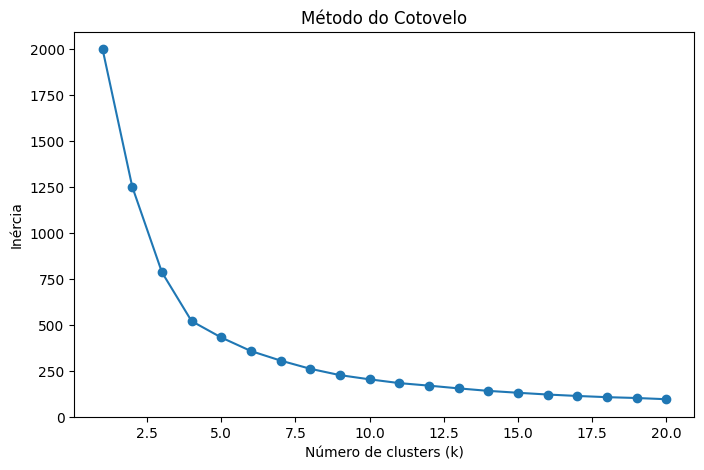

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

# 7. Escolher o número de clusters


In [ ]:
k = 4  # Número de clusters escolhido

# 8. Treinamento do modelo K-means

In [ ]:
kmeans = KMeans(n_clusters=k, n_init=200, random_state=42)
kmeans.fit(df_scaled)
print(kmeans)

KMeans(n_clusters=4, n_init=200, random_state=42)


# 9. Adicionando rótulos dos clusters ao DataFrame


In [ ]:
df['cluster'] = kmeans.labels_

# 10. Primeiros resultados

In [ ]:
df_head = df.head()
print(df_head)

   idade  renda_anual  cluster
0     56       125186        2
1     69        54674        2
2     46       186926        1
3     32        66271        0
4     60        93688        2


# 11. Gráfico de dispersão para visualizar os clusters

<ipython-input-11-3aaaeac9c4b5>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


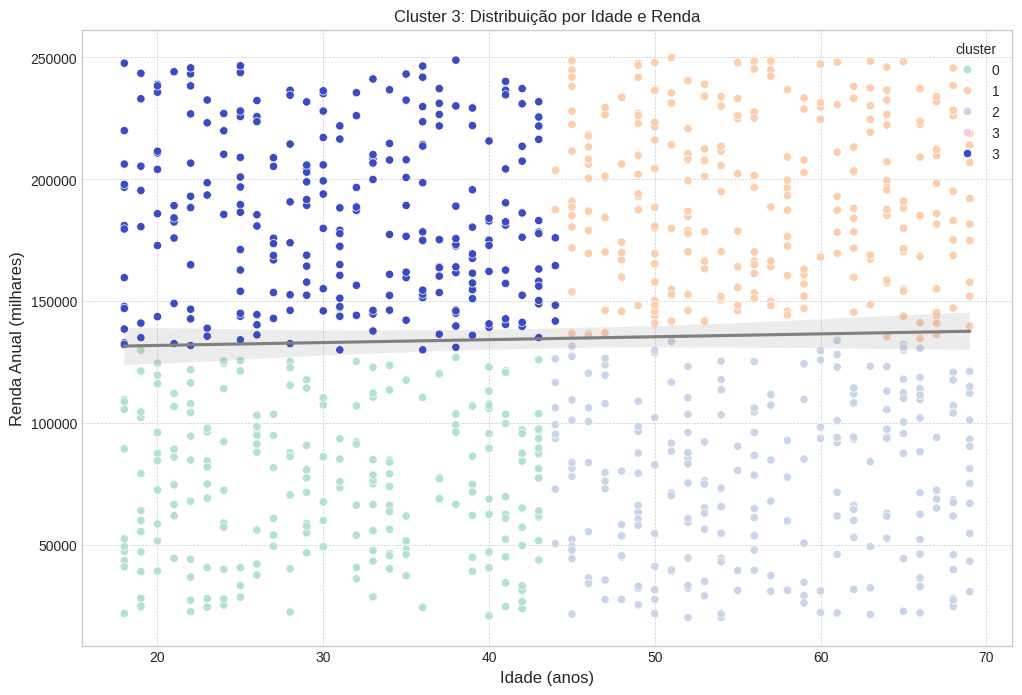

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 8))

sns.scatterplot(x=df['idade'],  y=df['renda_anual'], hue=df['cluster'], palette='Pastel2')
sns.regplot(x=df['idade'], y=df['renda_anual'], scatter=False, color='gray',)
plt.title('Distribuição de Clientes por Idade e Renda Anual', fontsize=16)
plt.xlabel('Idade (anos)', fontsize=12)
plt.ylabel('Renda Anual (milhares)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

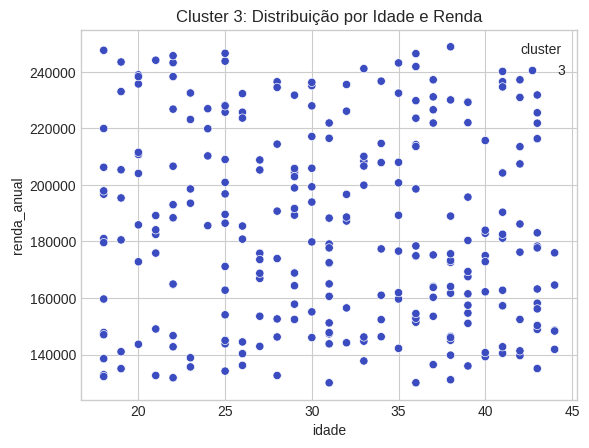

In [ ]:
cluster_3 = df[df['cluster'] == 3]
sns.scatterplot(x=cluster_3['idade'], y=cluster_3['renda_anual'], hue=cluster_3['cluster'], palette='coolwarm')
plt.title('Cluster 3: Distribuição por Idade e Renda')
plt.show()

# 12. Avaliação do modelo


In [ ]:
silhouette_avg = silhouette_score(df_scaled, kmeans.labels_) * 100
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 39.47271155398369


#13. Conclusão
Após a análise da linha de tendência do gráfico, concluo que, com o aumento da idade, há uma relação positiva com a renda anual, o que se reflete em um aumento no número de compras realizadas por essas pessoas. Caso haja a necessidade de aumentar o número de compras em um determinado nicho, é melhor focar na fidelização dos clientes do cluster 3, uma vez que este apresenta maior poder aquisitivo, apesar de possuir uma idade média menor.


# 14. Links
Para planilha com os dados [link](https://docs.google.com/spreadsheets/d/18QHiMjR_ZMZpCuZNuvBS0oAoqPtpeW_egUYg4YJgMfw/edit?usp=sharing)

Para o github [link](https://github.com/dpaslar/)

Para o Looker [link](https://lookerstudio.google.com/reporting/1b4ffbe6-7b93-4123-9a3e-4c0f7cb65e82)